In [4]:
import convokit
import spacy

from convokit import Corpus, Speaker, Utterance
from convokit import download
from convokit import TextParser
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
corpus = Corpus(download("wiki-corpus"), utterance_end_index=4000)

parser = TextParser(verbosity=1000)
corpus = parser.transform(corpus)

Dataset already exists at /Users/businge/.convokit/downloads/wiki-corpus
1000/4001 utterances processed
2000/4001 utterances processed
3000/4001 utterances processed
4000/4001 utterances processed
4001/4001 utterances processed


In [7]:
from convokit import PolitenessStrategies

ps = PolitenessStrategies()
corpus = ps.transform(corpus, markers=True)


In [8]:
path = '../../data/'
df_data = pd.read_csv(path + 'Repos_comments50.csv')
No = df_data.No.values.tolist()
mainline_repo = df_data.mainline_repo.values.tolist()
variant_repo = df_data.variant_repo.values.tolist()
ml_comments_after = df_data.ml_comments_before.values.tolist()
ml_comments_before = df_data.ml_comments_after.values.tolist()
len(ml_comments_after[0])
ml_comments_after[0]

utt = corpus.get_utterance('480633')
print("RAW TEXT: " + ml_comments_after[0] + "\n")

print("Sentences: ")
for i, x in enumerate(utt.meta["parsed"]):
    stra = ""
    for y in x["toks"]:
        stra += " " + y["tok"]

    print(str(i) + " " + stra[:50] + "...")

print()
for ((k,v),(k1,v2)) in zip(utt.meta["politeness_strategies"].items(),utt.meta["politeness_markers"].items()):
    if v != 0:
        print(k[21:len(k)-2] + " results:")
        print("Markers: " + str(v2) + "\n")

RAW TEXT: lgtm, this is probably a major version change though right? @cherifGsoul can you run the `canjs/canjs` tests with this change and mention what happens? I included this branch into the canjs tests and everything is passing green except core build size.  @cherifGsoul  you should be able to merge and publish. Agree. We do as chrome do.  For the most part, things that go on the `window` go in can-vdom and things that go on the `document` go here. So I'd probably move this into can-vdom. Also, I'd probably wrap this code inside of a function so that a new "instance" is created for every request and not shared between requests (not that it likely matters much in this case). 
> So I'd probably move this into can-vdom.

@matthewp did you mean to attach that comment to particular lines, or did you mean the entire PR? The entire pr It was just the customElements shim at the time, so I just mean that part. Closing this branch since it was made off an early commit on master. Work continu

In [9]:
spacy_nlp = spacy.load('en', disable=['ner'])

utt = ps.transform_utterance(ml_comments_after[0], spacy_nlp=spacy_nlp)
utt.meta['politeness_strategies']


{'feature_politeness_==Please==': 1,
 'feature_politeness_==Please_start==': 1,
 'feature_politeness_==HASHEDGE==': 1,
 'feature_politeness_==Indirect_(btw)==': 0,
 'feature_politeness_==Hedges==': 1,
 'feature_politeness_==Factuality==': 1,
 'feature_politeness_==Deference==': 0,
 'feature_politeness_==Gratitude==': 1,
 'feature_politeness_==Apologizing==': 1,
 'feature_politeness_==1st_person_pl.==': 1,
 'feature_politeness_==1st_person==': 1,
 'feature_politeness_==1st_person_start==': 1,
 'feature_politeness_==2nd_person==': 1,
 'feature_politeness_==2nd_person_start==': 1,
 'feature_politeness_==Indirect_(greeting)==': 1,
 'feature_politeness_==Direct_question==': 1,
 'feature_politeness_==Direct_start==': 1,
 'feature_politeness_==HASPOSITIVE==': 1,
 'feature_politeness_==HASNEGATIVE==': 1,
 'feature_politeness_==SUBJUNCTIVE==': 1,
 'feature_politeness_==INDICATIVE==': 1}

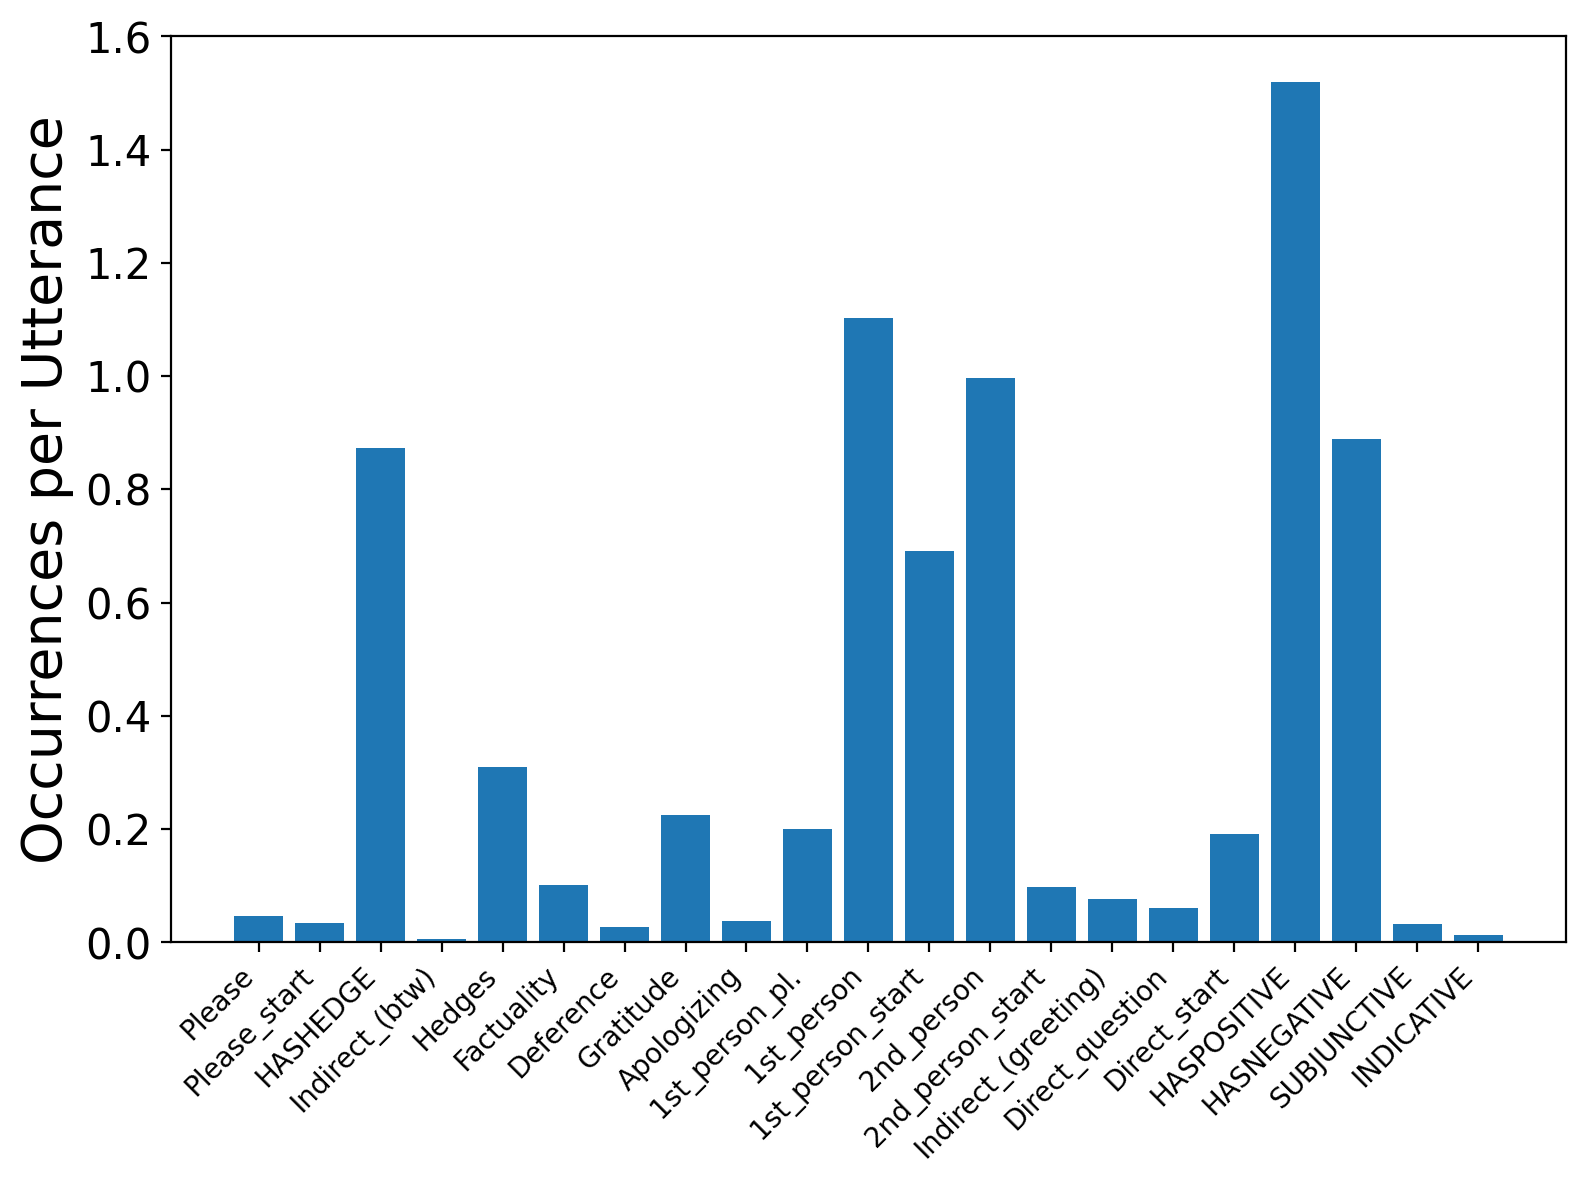

In [10]:
data = ps.summarize(corpus, plot=True, y_lim = 1.6)

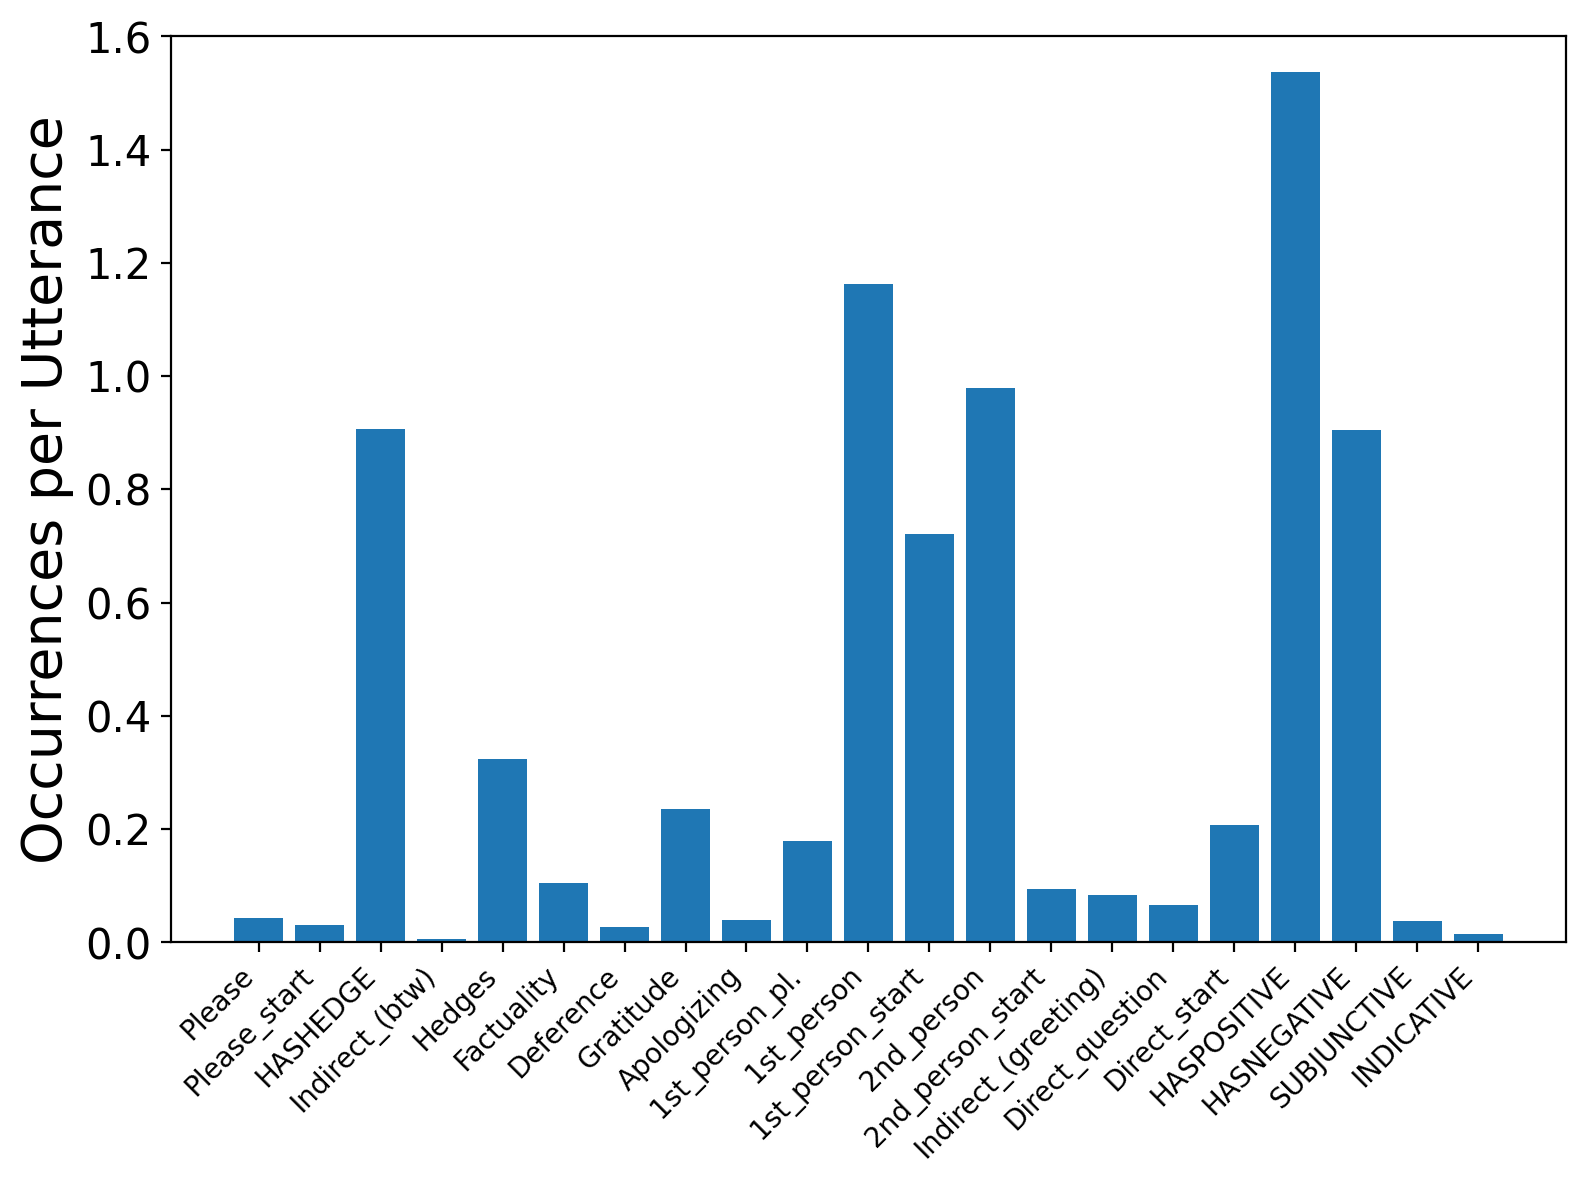

In [11]:
query = lambda x : not x.meta["is-admin"]
non_admin_data = ps.summarize(corpus, query, plot = True, y_lim = 1.6)


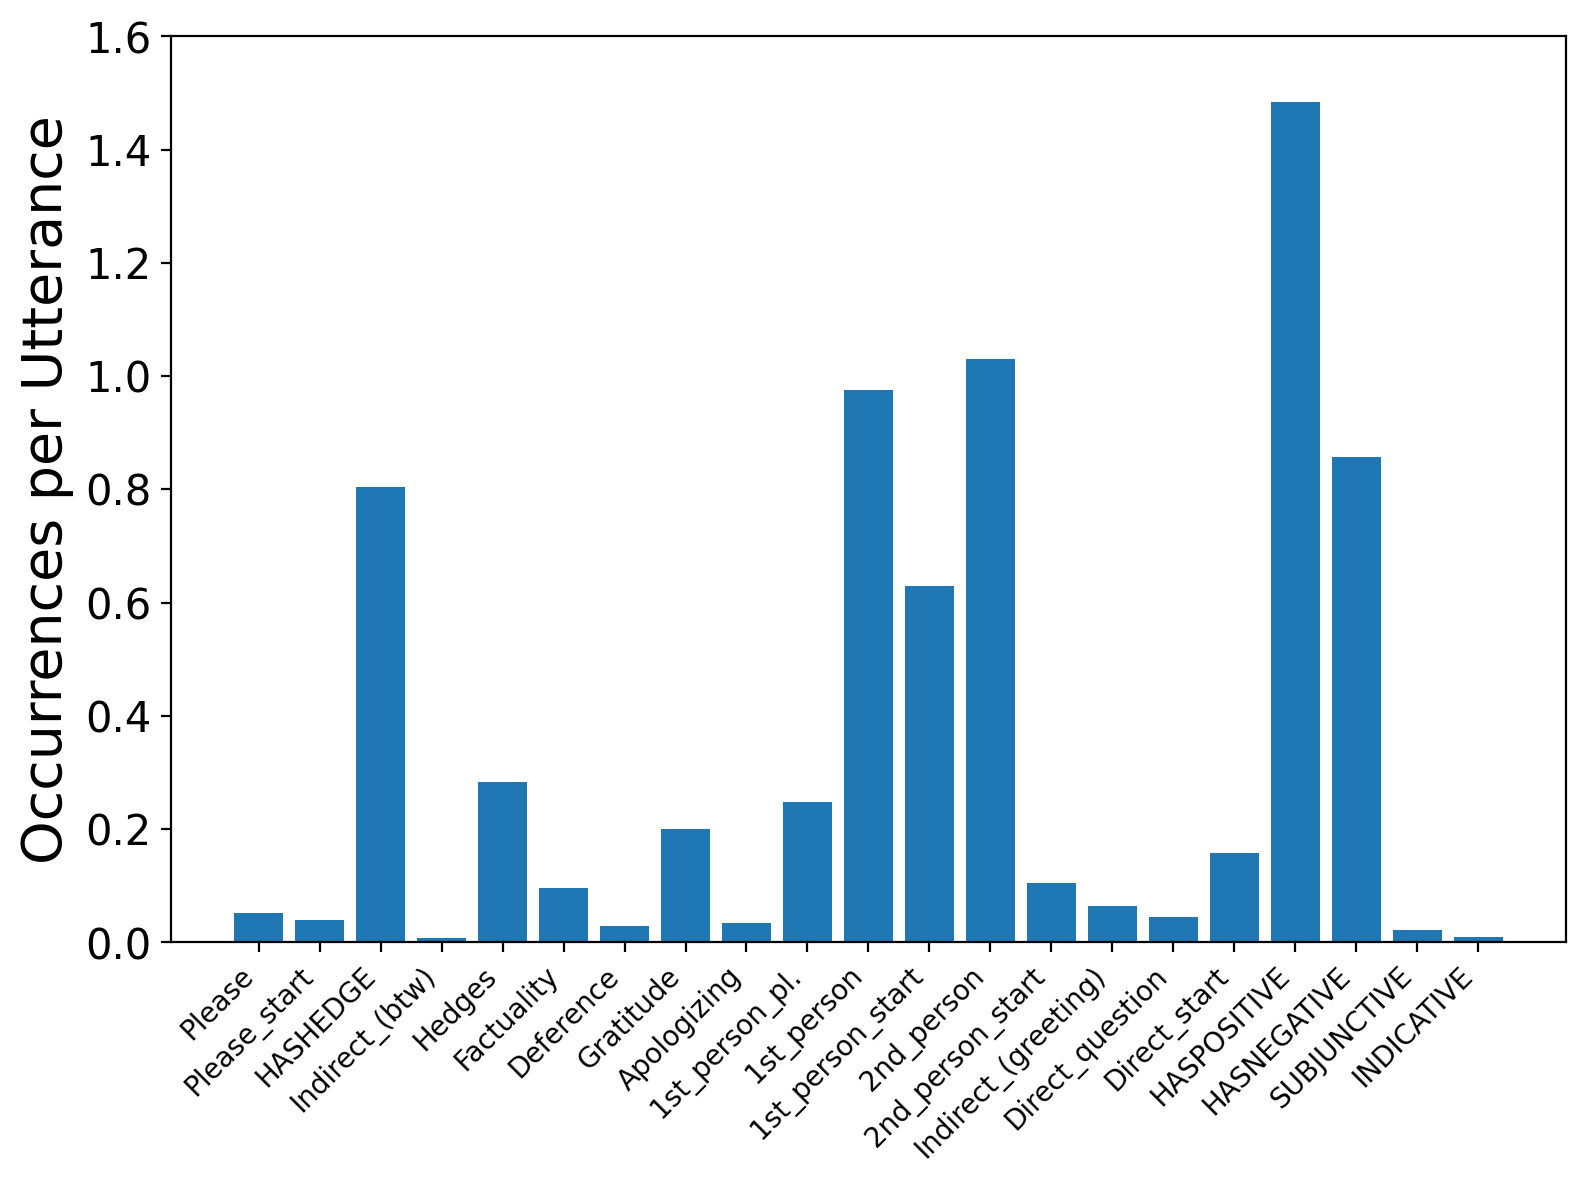

In [12]:
query = lambda x : x.meta["is-admin"]
admin_data = ps.summarize(corpus, query, plot = True, y_lim = 1.6)


In [13]:
round(non_admin_data - admin_data, 2)

Averages
Please                  -0.01
Please_start            -0.01
HASHEDGE                 0.10
Indirect_(btw)          -0.00
Hedges                   0.04
Factuality               0.01
Deference               -0.00
Gratitude                0.04
Apologizing              0.01
1st_person_pl.          -0.07
1st_person               0.19
1st_person_start         0.09
2nd_person              -0.05
2nd_person_start        -0.01
Indirect_(greeting)      0.02
Direct_question          0.02
Direct_start             0.05
HASPOSITIVE              0.05
HASNEGATIVE              0.05
SUBJUNCTIVE              0.02
INDICATIVE               0.01